In [390]:
import numpy as np
from matplotlib import pyplot as plt
import interp_tools as it
from scipy.interpolate import interp1d

from numpy.polynomial import polynomial as P
from functools import partial
import math

Sea $f(x)=e^x$ 
   

In [368]:
def f(x):
    z = np.cos(x) + np.sin(3*x) + np.cos(np.sqrt(x)) + np.cos(18*x)
    return z

In [395]:
f = lambda x: np.exp(x)

y una partición regular en el intervalo $[0, 1]$ donde se construye el polinomio interpolante de orden $n$, $P_n(x)$.   

#### Interpolación de Newton con N puntos:

In [396]:
N = 30

In [397]:
xd = np.linspace(2, 10, N)

In [398]:
yd = f(xd)

In [399]:
xi = np.linspace(min(xd), max(xd), 200)
ym = f(xi)

_______

In [400]:
yl = it.interp_newton(xi, xd, yd)

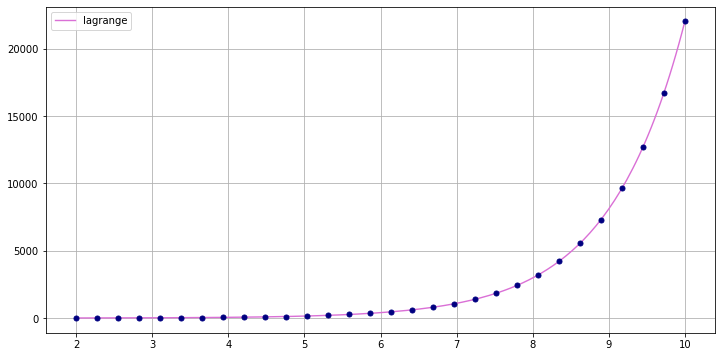

In [401]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(xi, yl, linewidth=1.4, linestyle='-', color='orchid', 
        label='lagrange')
ax.plot(xd, yd, marker='o', linestyle='None', color='navy', markersize=5)
ax.grid()
ax.legend()

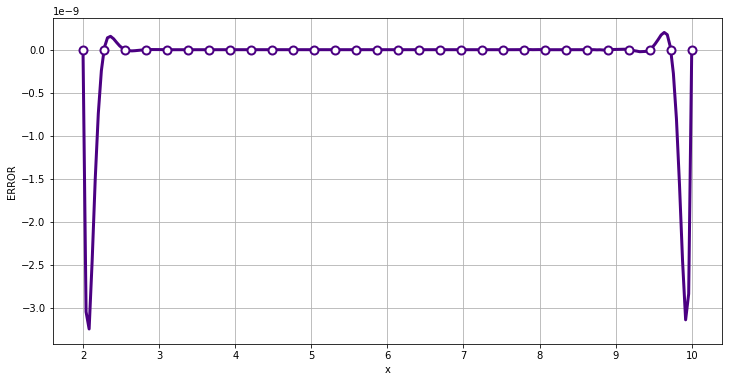

In [402]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(xi, yl-ym, linewidth=3, color='indigo')

ax.plot(xd, [0]*len(xd), marker='o', linestyle='None', color='navy',
        markersize=8, mfc='white', mec='indigo', mew=2)
ax.set_ylabel('ERROR')
ax.set_xlabel('x')
ax.grid()

Veamos juntos los errores para diferentes N

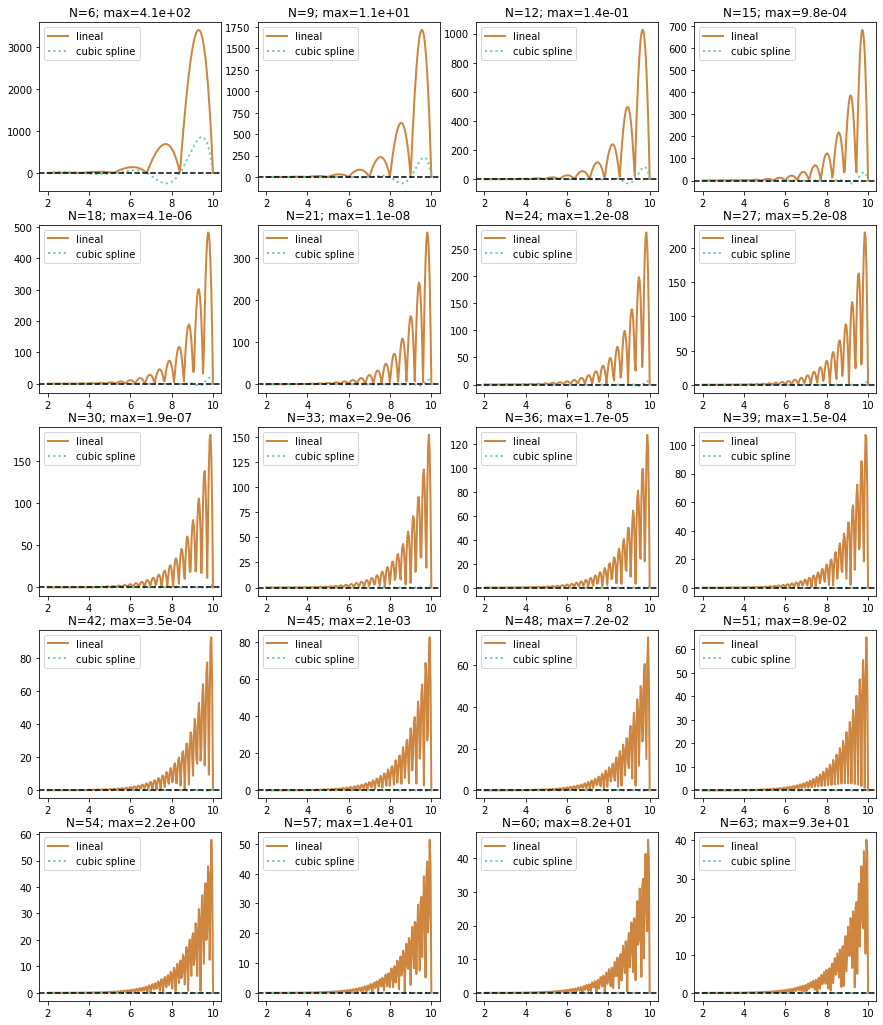

In [403]:
fig, axs = plt.subplots(5, 4, figsize=[15, 18])

for N, ax in zip(range(6, 66, 3), axs.flat):
    xd = np.linspace(2, 10, N)
    yd = f(xd)
    
    xi = np.linspace(min(xd), max(xd), 200)
    ym = f(xi)
    
    ylgg = it.interp_lagrange(xi, xd, yd)
    mx = max(ylgg-ym)
    
    ylin = np.interp(xi, xd, yd)
    
    spline = interp1d(xd, yd, kind='cubic')
    ysp3 = spline(xi)
    
    #ax.plot(xi, ylgg-ym, linewidth=2, color='cornflowerblue', label='lagrange')
    ax.plot(xi, ylin-ym, linewidth=2, color='peru', label='lineal')
    ax.plot(xi, ysp3-ym, linewidth=2, color='mediumaquamarine', linestyle=':', label='cubic spline')
    ax.set_title(f'N={N}; max={mx:5.1e}')
    ax.legend()
    ax.axhline(0, linestyle='--', color='k')